In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import scipy
from sympy import Symbol, solve, Poly


In [413]:
w=np.exp(np.random.normal(size=100000))*120

In [414]:
w

array([572.42208331,  79.58775604, 205.48073951, ...,  23.63095891,
       110.50250996,  73.0643957 ])

(array([9.7173e+04, 2.3210e+03, 3.6900e+02, 8.9000e+01, 2.4000e+01,
        1.4000e+01, 5.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([1.45023194e+00, 8.03457945e+02, 1.60546566e+03, 2.40747337e+03,
        3.20948108e+03, 4.01148880e+03, 4.81349651e+03, 5.61550422e+03,
        6.41751193e+03, 7.21951965e+03, 8.02152736e+03]),
 <BarContainer object of 10 artists>)

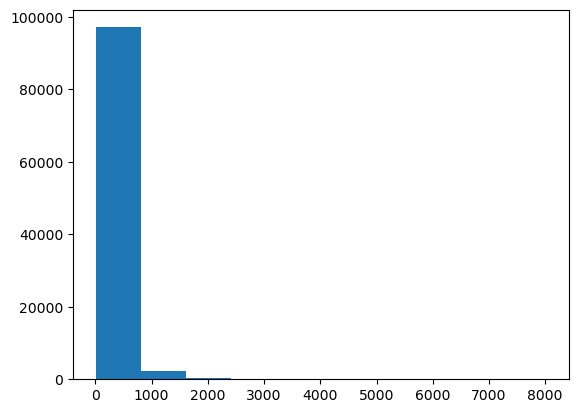

In [415]:
plt.hist(w)

In [416]:
np.max(w)

8021.527360575179

In [417]:
np.min(w)

1.450231940008679

In [418]:
b_1=(np.random.uniform(-1,11,len(w))+3*w/np.mean(w))/10000
b_2=(np.random.uniform(-2,10,len(w))+3*w/np.mean(w))/10000

b_1=b_1*(1-w<=5*np.random.binomial(1,0.2,len(w)))
b_2=b_2*(1-w<=3*np.random.binomial(1,0.1,len(w)))


(array([7.9217e+04, 1.9574e+04, 9.4800e+02, 1.8100e+02, 4.7000e+01,
        1.8000e+01, 8.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([-0.0001864 ,  0.00103288,  0.00225216,  0.00347144,  0.00469072,
         0.00590999,  0.00712927,  0.00834855,  0.00956783,  0.01078711,
         0.01200639]),
 <BarContainer object of 10 artists>)

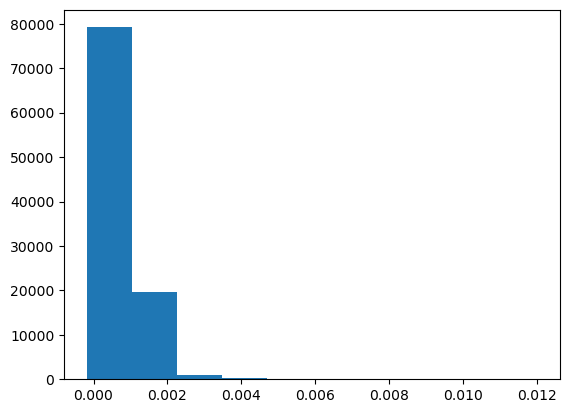

In [419]:
plt.hist(b_2)

In [420]:
c_1=b_1*w
c_2=b_2*w

(array([9.9858e+04, 1.0300e+02, 2.1000e+01, 8.0000e+00, 4.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-6.56847140e-03,  9.62504328e+00,  1.92566550e+01,  2.88882668e+01,
         3.85198785e+01,  4.81514903e+01,  5.77831020e+01,  6.74147138e+01,
         7.70463255e+01,  8.66779373e+01,  9.63095490e+01]),
 <BarContainer object of 10 artists>)

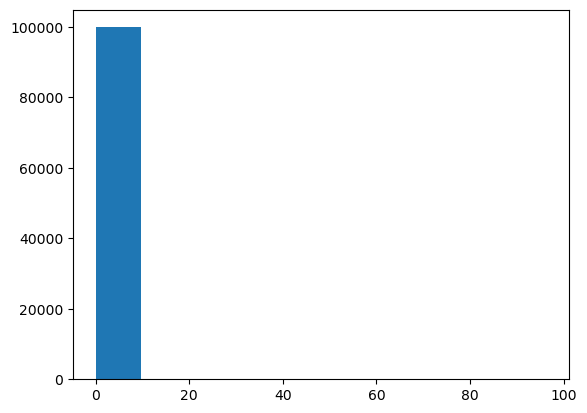

In [421]:
plt.hist(c_2)

# Method 1 (Taylor or Fieller)

In [422]:
ratio_1_lower=np.mean(c_1)/np.mean(w)-1.96*(np.mean(c_1)/np.mean(w))*np.sqrt(1/(len(w))*
    np.matmul([1/np.mean(c_1),1/np.mean(w)],np.matmul(np.cov(c_1,w),[[1/np.mean(c_1)],[1/np.mean(w)]])))

ratio_1_upper=np.mean(c_1)/np.mean(w)+1.96*(np.mean(c_1)/np.mean(w))*np.sqrt(1/(len(w))*
    np.matmul([1/np.mean(c_1),1/np.mean(w)],np.matmul(np.cov(c_1,w),[[1/np.mean(c_1)],[1/np.mean(w)]])))

ratio_2_lower=np.mean(c_2)/np.mean(w)-1.96*(np.mean(c_2)/np.mean(w))*np.sqrt(1/(len(w))*
    np.matmul([1/np.mean(c_2),1/np.mean(w)],np.matmul(np.cov(c_2,w),[[1/np.mean(c_2)],[1/np.mean(w)]])))

ratio_2_upper=np.mean(c_2)/np.mean(w)+1.96*(np.mean(c_2)/np.mean(w))*np.sqrt(1/(len(w))*
    np.matmul([1/np.mean(c_2),1/np.mean(w)],np.matmul(np.cov(c_2,w),[[1/np.mean(c_2)],[1/np.mean(w)]])))

In [425]:
ratio_2_upper[0]

0.0012572927241588602

In [424]:
ratio_2_lower

array([0.00117646])

In [198]:
scipy.stats.rankdata(c_1,method='ordinal')

array([55909, 81951, 89043, ..., 16941, 43185, 51701])

In [199]:
np.var(w)

67905.70700464274

In [200]:
np.var(c_1)

1.9530501876111002

# Method 2 (Rank)

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11,  8, 14, 12, 13])

In [235]:
pool=list(enumerate(np.hstack((c_1,c_2))))
np.random.shuffle(pool)
indices,pool = zip(*pool)
indices=np.array(indices)
pool=np.array(pool)

In [236]:
indices

array([ 14104,  93823,  81159, ..., 122735, 144255, 163896])

In [272]:
n=len(w)
m=len(w)

In [238]:
pool_rank=scipy.stats.rankdata(pool,method='ordinal')

In [239]:
pool_rank

array([156495, 151139, 180467, ..., 183609,  62244, 106410])

In [240]:
indices

array([ 14104,  93823,  81159, ..., 122735, 144255, 163896])

In [273]:
R_Y_tot**2

array([  393704964,  7506836164,  8784000729, ..., 33712264881,
        3874315536, 11323088100])

In [268]:
R_X_in=scipy.stats.rankdata(pool_rank[indices<n],method='ordinal')
R_X_tot=pool_rank[indices<n]
R_Y_in=scipy.stats.rankdata(pool_rank[indices>=n],method='ordinal')
R_Y_tot=pool_rank[indices>=n]

In [271]:
mu=n*(m+n+1)/2    

In [289]:
sum(R_X_tot**2)-2*sum(R_X_tot*R_X_in)+n*(n+1)*(2*n+1)/6

362401756880862.0

In [300]:
sigma=n*m*(n+m+1)/12-n**2*m*(1/3-(sum(R_Y_tot**2)-2*sum(R_Y_tot*R_Y_in)+m*(m+1)*(2*m+1)/6)/n**2/m)-n*m**2*(
-2/3-(n*(n+1)-2*sum(R_X_tot))/n/m-(sum(R_X_tot**2)-2*sum(R_X_tot*R_X_in)+n*(n+1)*(2*n+1)/6)/n/m**2)

In [301]:
(sum(R_X_tot)-mu)/np.sqrt(sigma)

35.76252023088363

In [302]:
mu

10000050000.0

In [303]:
sum(R_X_tot)

10353219736

In [304]:
sigma

97523825439561.38

In [309]:
sigma

97523825439561.38

In [310]:
n*m*(n+m+1)/12

166667500000000.0

In [312]:
sigma/(n*m*(n+m+1)/12)

0.5851400269372335

In [317]:
a1=n**2*m**2
b1= -2*n*m*(sum(R_X_tot)-n*(n+m+1)/2)
c1=(sum(R_X_tot)-n*(n+m+1)/2)**2
a2=-n*m*(n+m+1)
b2=n**2*m+n*m**2
c2=n*m*(n+m+1)/12+n**2*m*(-1/3+(sum(R_Y_tot**2)-2*sum(R_Y_tot*R_Y_in)+m*(m+1)*(2*m+1)/6)/n**2/m)+n*m**2*(
2/3+(n*(n+1)-2*sum(R_X_tot))/n/m+(sum(R_X_tot**2)-2*sum(R_X_tot*R_X_in)+n*(n+1)*(2*n+1)/6)/n/m**2)

In [318]:
find_range_where_f_less_than_g(a1, b1, c1, a2, b2, c2)

[(0.0353262670711259, inf)]

## Streaming CI

In [71]:
from decimal import Decimal, getcontext

getcontext().prec = 50  # Set 
def solve_quadratic (a,b,c):
    a, b, c = Decimal(a), Decimal(b), Decimal(c)
    d = (b**2) - (4*a*c)
    sol1 = float((-b-np.sqrt(d))/(2*a))
    sol2 = float((-b+np.sqrt(d))/(2*a))
    return [sol1,sol2]

In [72]:
def find_x_where_f_equals_g(a1, b1, c1, a2, b2, c2):
    
    
    return solve_quadratic(a1-a2,b1-b2,c1-c2)

In [73]:
w_t=np.exp(np.random.normal(size=100000))*120
b_1t=(np.random.uniform(-1,11,len(w_t))+3*w_t/np.mean(w_t))/10000
b_2t=(np.random.uniform(-2,10,len(w_t))+3*w_t/np.mean(w_t))/10000

b_1t=b_1t*(1-w_t<=5*np.random.binomial(1,0.2,len(w_t)))
b_2t=b_2t*(1-w_t<=5*np.random.binomial(1,0.2,len(w_t)))

In [81]:
res=[-0.5,0.5]
res_1=[-5,15]
res_2=[-5,15]
for i in np.arange(100,100000,100):
    w=w_t[:i]
    b_1=b_1t[:i]
    b_2=b_2t[:i]
    c_1=b_1*w
    c_2=b_2*w
    pool=list(enumerate(np.hstack((c_1,c_2))))
    np.random.shuffle(pool)
    indices,pool = zip(*pool)
    indices=np.array(indices)
    pool=np.array(pool)
    n=i
    m=i
    pool_rank=scipy.stats.rankdata(pool,method='ordinal')
    R_X_in=scipy.stats.rankdata(pool_rank[indices<n],method='ordinal')
    R_X_tot=pool_rank[indices<n]
    R_Y_in=scipy.stats.rankdata(pool_rank[indices>=n],method='ordinal')
    R_Y_tot=pool_rank[indices>=n]
    a1=n*m
    b1= -2*(sum(R_X_tot)-n*(n+m+1)/2)
    c1=(sum(R_X_tot)/n-n)**2
    a2=-(n+m-1)*1.96**2
    b2=(m+n)*1.96**2
    c2=1.96**2*((n+m+1)/12+m*(-1/3+(sum(R_Y_tot**2)-2*sum(R_Y_tot*R_Y_in)+m*(m+1)*(2*m+1)/6)/n**2/m)+n*(2/3+(n*(n+1)-2*sum(R_X_tot))/n/m+(sum(R_X_tot**2)-2*sum(R_X_tot*R_X_in)+n*(n+1)*(2*n+1)/6)/n/m**2))
    res=np.vstack((res,find_x_where_f_equals_g(a1, b1, c1, a2, b2, c2)))
    ratio_1_lower=np.mean(c_1)/np.mean(w)-1.96*(np.mean(c_1)/np.mean(w))*np.sqrt(1/(len(w))*np.matmul([1/np.mean(c_1),1/np.mean(w)],np.matmul(np.cov(c_1,w),[[1/np.mean(c_1)],[1/np.mean(w)]])))
    ratio_1_upper=np.mean(c_1)/np.mean(w)+1.96*(np.mean(c_1)/np.mean(w))*np.sqrt(1/(len(w))*np.matmul([1/np.mean(c_1),1/np.mean(w)],np.matmul(np.cov(c_1,w),[[1/np.mean(c_1)],[1/np.mean(w)]])))
    res_1=np.vstack((res_1,[ratio_1_lower[0],ratio_1_upper[0]]))
    ratio_2_lower=np.mean(c_2)/np.mean(w)-1.96*(np.mean(c_2)/np.mean(w))*np.sqrt(1/(len(w))*np.matmul([1/np.mean(c_2),1/np.mean(w)],np.matmul(np.cov(c_2,w),[[1/np.mean(c_2)],[1/np.mean(w)]])))
    ratio_2_upper=np.mean(c_2)/np.mean(w)+1.96*(np.mean(c_2)/np.mean(w))*np.sqrt(1/(len(w))*np.matmul([1/np.mean(c_2),1/np.mean(w)],np.matmul(np.cov(c_2,w),[[1/np.mean(c_2)],[1/np.mean(w)]])))
    res_2=np.vstack((res_2,[ratio_2_lower[0],ratio_2_upper[0]]))

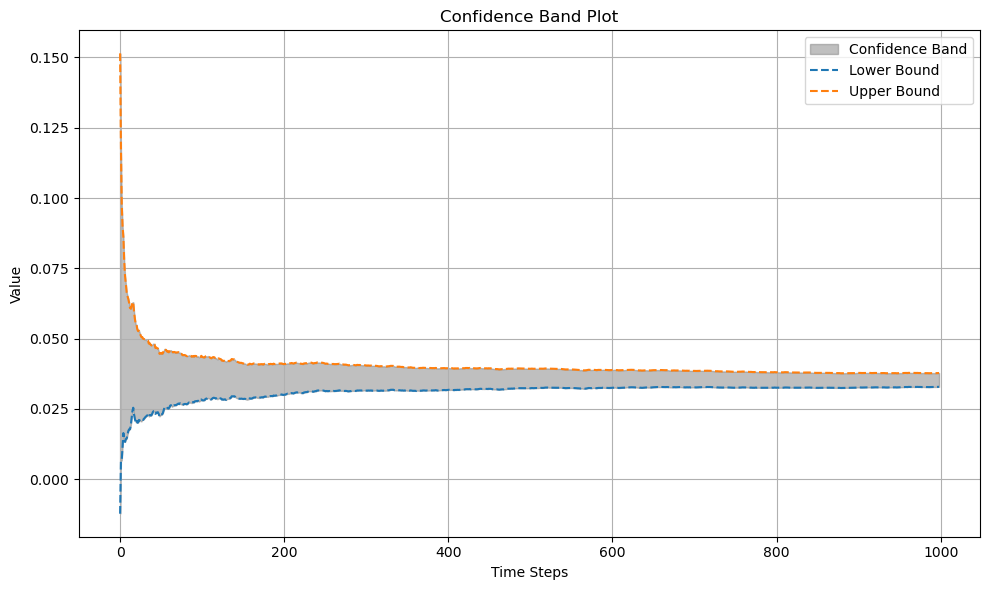

In [82]:

data_list = res[1:]
# Convert to numpy array and ensure all elements are floats
data = np.array(data_list, dtype=float)

# Ensure that there are no NaN values

# Assuming the x-axis represents a sequence of time steps
time_steps = np.arange(data.shape[0])

# Plotting the confidence band
plt.figure(figsize=(10,6))
plt.fill_between(time_steps, data[:,0], data[:,1], color='gray', alpha=0.5, label='Confidence Band')
plt.plot(time_steps, data[:,0], label='Lower Bound', linestyle='--')
plt.plot(time_steps, data[:,1], label='Upper Bound', linestyle='--')
plt.legend()
plt.title('Confidence Band Plot')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()


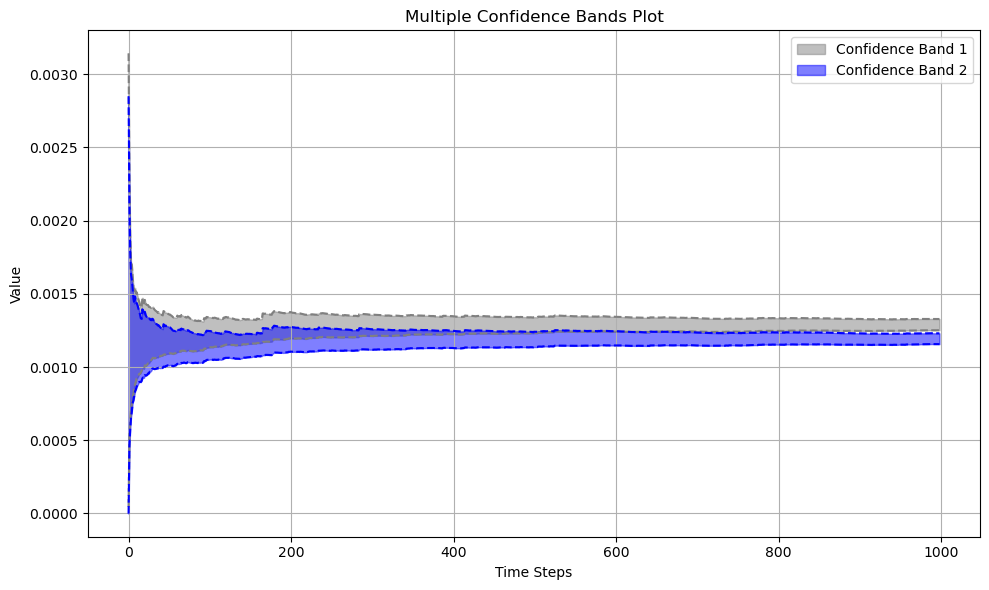

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for the first band: n x 2 matrix
data1 = res_1[1:]

# Sample data for the second band: n x 2 matrix
data2 = res_2[1:]
# Assuming the x-axis represents a sequence of time steps
time_steps = np.arange(data1.shape[0])

plt.figure(figsize=(10,6))

# Plotting the first confidence band
plt.fill_between(time_steps, data1[:,0], data1[:,1], color='gray', alpha=0.5, label='Confidence Band 1')
plt.plot(time_steps, data1[:,0], linestyle='--', color='gray')
plt.plot(time_steps, data1[:,1], linestyle='--', color='gray')

# Plotting the second confidence band
plt.fill_between(time_steps, data2[:,0], data2[:,1], color='blue', alpha=0.5, label='Confidence Band 2')
plt.plot(time_steps, data2[:,0], linestyle='--', color='blue')
plt.plot(time_steps, data2[:,1], linestyle='--', color='blue')

plt.legend()
plt.title('Multiple Confidence Bands Plot')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()
